# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
#importando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#carregando a base de dados tips
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [5]:
#criando um dummy somente para a variavel dinner e adicionando no dataframe

tips_scat = pd.get_dummies(tips['time'])
tips_scat
tips['Dinner'] = tips_scat['Dinner']

In [6]:
#usando o patsy para criar as matrizes
y, X = patsy.dmatrices('tip ~ sex + smoker + Dinner + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  Dinner[T.True]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [7]:
# Ajustando o modelo
model = smf.ols('tip ~ sex + smoker + Dinner + net_bill', data=tips).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        22:20:28   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

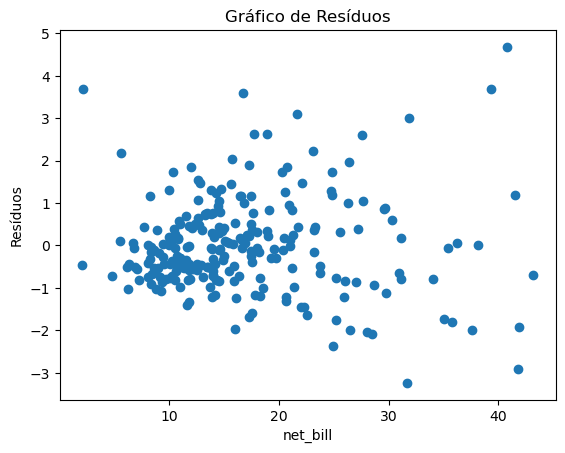

In [8]:
# Resíduos
res = model.resid

# Plot dos resíduos vs net_bill
plt.scatter(tips['net_bill'], res)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

In [9]:
model2 = smf.ols('tip ~ Dinner + net_bill', data=tips).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           6.62e-22
Time:                        22:20:29   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3015      0.191      6.

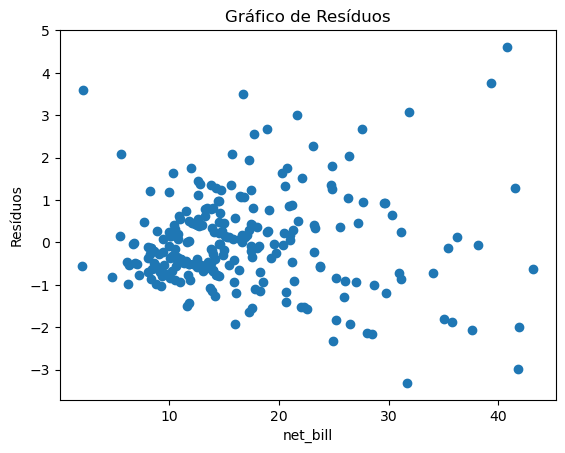

In [10]:
# Resíduos
res = model2.resid

# Plot dos resíduos vs net_bill
plt.scatter(tips['net_bill'], res)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

In [11]:
# Logaritmo
tips['log_net_bill'] = np.log(tips['net_bill'])

# Polinômio de segundo grau (exemplo)
tips['net_bill_sq'] = tips['net_bill']**2

# Modelo com transformações
model_log = smf.ols('tip ~ Dinner + log_net_bill', data=tips).fit()
model_poly = smf.ols('tip ~ Dinner + net_bill + net_bill_sq', data=tips).fit()

# Comparar os modelos utilizando métricas como R-quadrado ajustado, AIC e BIC

In [12]:
print(model_log.summary())
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           4.90e-19
Time:                        22:20:29   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2818      0.433     -2.

o modelo com o R2 0.333

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [20]:
y, X = patsy.dmatrices(data = tips, formula_like = 'tip_pct ~ sex + smoker + time + net_bill + 1')

model_log_tip  = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        22:20:45   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [24]:
# REMOVENDO 'SMOKER' E 'TIME' QUE FICARAM COM UM P-VALUE MAIOR QUE 60%

y, X = patsy.dmatrices(data = tips, formula_like = 'tip_pct ~ sex + net_bill')

model_log_tip = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        22:20:55   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

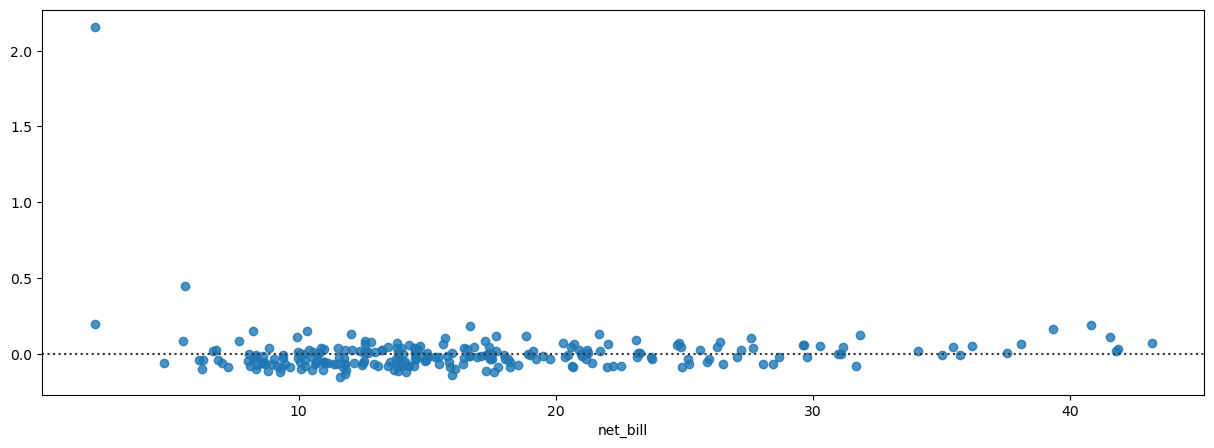

In [26]:
plt.figure(figsize=[15,5])

sns.residplot(data = tips, x = 'net_bill', y = model_log_tip.resid)

plt.show()

In [30]:
# TRANFORMANDO NET_BILL EM LOG:

y, X = patsy.dmatrices(data = tips, 
                       formula_like = 'tip_pct ~ sex + smoker + time + np.log(net_bill) + 1')

reg = sm.OLS(y, X)
model_log_tip = reg.fit()

r_squared_log = model.rsquared



# TRANFORMANDO NET_BILL EM POLINÔMIO:

y, X = patsy.dmatrices(data = tips, 
                       formula_like = 'tip_pct ~ sex + smoker + time + np.power(net_bill, 2) + 1')

reg = sm.OLS(y, X)
model_log_tip = reg.fit()

r_squared_polinomio = model_log_tip.rsquared



print(f"R-squared com log(net_bill) = {round(r_squared_log*100, 2)}%")
print(f"R-squared com power(net_bill) = {round(r_squared_polinomio*100, 2)}%")

R-squared com log(net_bill) = 33.52%
R-squared com power(net_bill) = 6.6%


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

<Axes: xlabel='tempo_emprego', ylabel='renda'>

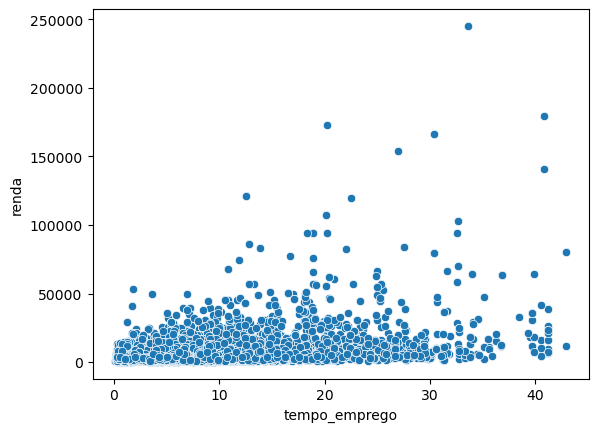

In [32]:
# Carregando a base de dados
df = pd.read_csv('previsao_de_renda.csv')

# Análise exploratória inicial
df.head()
df.describe()
df.info()

# Visualizando a relação entre renda e tempo_emprego
sns.scatterplot(x='tempo_emprego', y='renda', data=df)

In [34]:
#removendo valores faltantes
df = df.dropna()

In [36]:
# ajustando o modelo

reg = smf.ols('renda ~ tempo_emprego', data= df).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:21:33   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

In [38]:
df['res'] = reg.resid

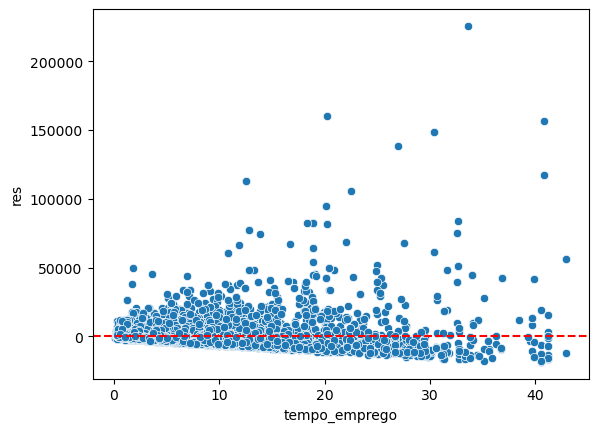

In [40]:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2103.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:21:57   Log-Likelihood:            -1.2966e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

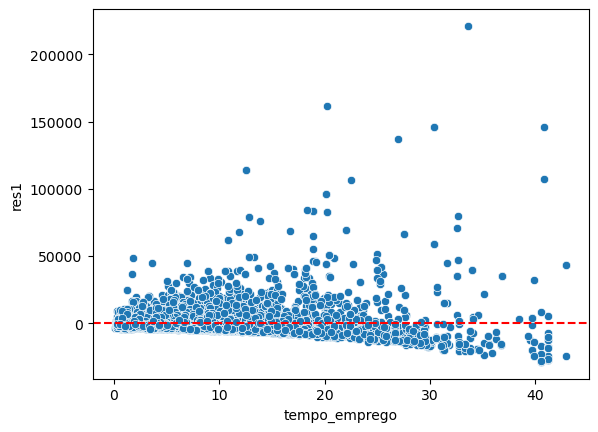

In [42]:
#analisando como melhorar o modelo
reg1 = smf.ols('renda ~ np.power(tempo_emprego,2)', data= df).fit()
print(reg1.summary())
df['res1'] = reg1.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [44]:
df['pred1']= reg.fittedvalues
df['pred'] = reg1.fittedvalues

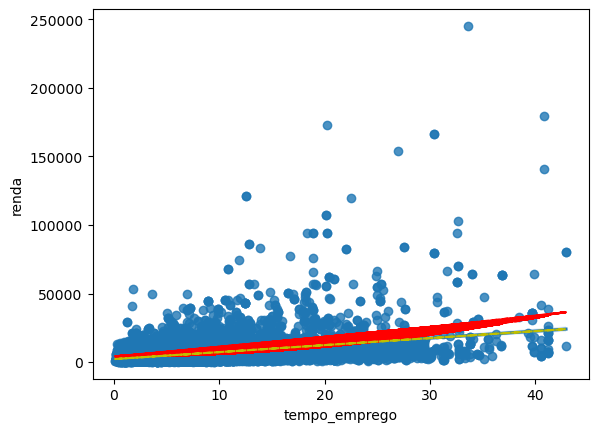

In [46]:
sns.regplot(y = 'renda', x = 'tempo_emprego', data = df)
plt.plot(df['tempo_emprego'], df['pred'], 'r--')
plt.plot(df['tempo_emprego'], df['pred1'], 'y--')

In [48]:
#usando o patsy para criar as matrizes
y, X = patsy.dmatrices('renda ~ tempo_emprego + posse_de_veiculo + posse_de_imovel', df)
X

DesignMatrix with shape (12427, 4)
  Intercept  posse_de_veiculo[T.True]  posse_de_imovel[T.True]  tempo_emprego
          1                         0                        1        6.60274
          1                         1                        1        7.18356
          1                         1                        1        0.83836
          1                         0                        1        4.84658
          1                         1                        0        4.29315
          1                         0                        1        4.34521
          1                         0                        1        6.37808
          1                         0                        1        3.10411
          1                         0                        1       18.60548
          1                         1                        1       10.55890
          1                         0                        0        2.08767
          1                  

In [50]:
#criando e treinando o modelo

modelo_df = sm.OLS(y,X).fit()
print(modelo_df.summary())

#residuos
df['res1'] = modelo_df.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     795.0
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:22:46   Log-Likelihood:            -1.2954e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12423   BIC:                         2.591e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

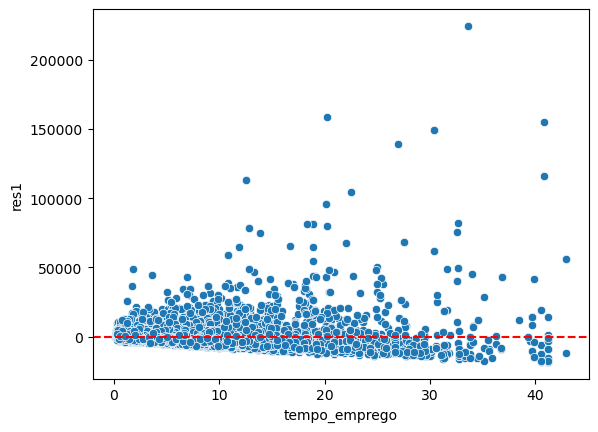

In [52]:
sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [54]:
y, X = patsy.dmatrices('renda ~ np.power(tempo_emprego,2) + posse_de_veiculo + posse_de_imovel', df)
X

DesignMatrix with shape (12427, 4)
  Columns:
    ['Intercept',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'np.power(tempo_emprego, 2)']
  Terms:
    'Intercept' (column 0)
    'posse_de_veiculo' (column 1)
    'posse_de_imovel' (column 2)
    'np.power(tempo_emprego, 2)' (column 3)
  (to view full data, use np.asarray(this_obj))

In [56]:
#criando e treinando o modelo

modelo_df1 = sm.OLS(y,X).fit()
print(modelo_df1.summary())

#residuos
df['res2'] = modelo_df1.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     776.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:23:08   Log-Likelihood:            -1.2956e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12423   BIC:                         2.592e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

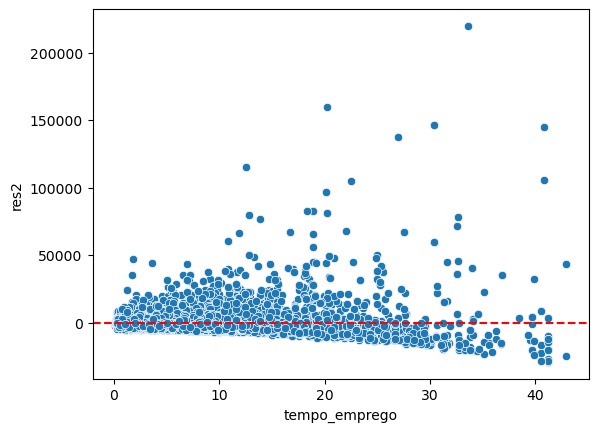

In [58]:
sns.scatterplot(x = 'tempo_emprego', y = 'res2', data = df)
plt.axhline(y=0, color='r', linestyle='--')

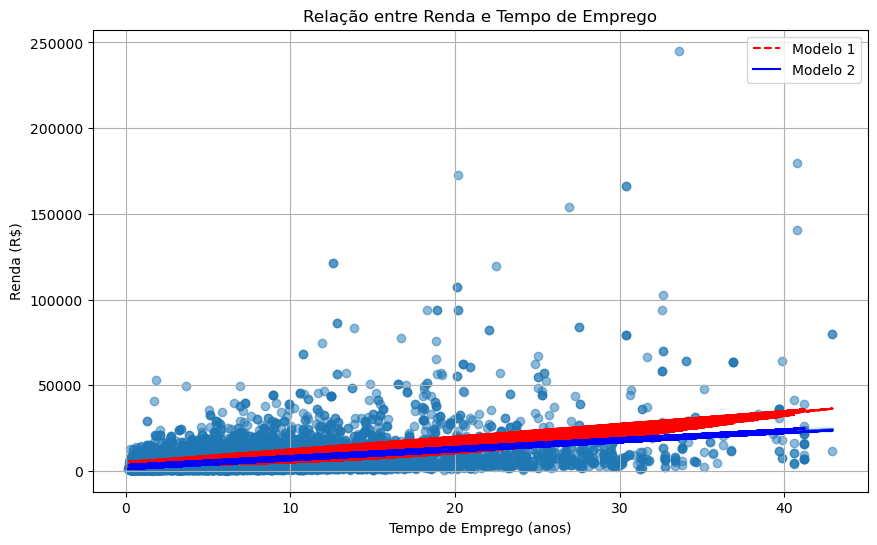

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (seu código anterior)

# Personalizando o gráfico
plt.figure(figsize=(10, 6))
sns.regplot(y='renda', x='tempo_emprego', data=df, scatter_kws={'alpha': 0.5})  # Ajusta a transparência dos pontos
plt.plot(df['tempo_emprego'], df['pred3'], 'r--', label='Modelo 1')
plt.plot(df['tempo_emprego'], df['pred2'], 'b-', label='Modelo 2')

plt.title('Relação entre Renda e Tempo de Emprego')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Renda (R$)')
plt.legend()
plt.grid(True)  # Adiciona grid para facilitar a leitura
plt.show()

In [ ]:
o modelo com o r2 0.158 é melhor